<span style='font-family:"Times New Roman"'> <span style='font-size:20px'> 
# <center>Shake Table Analysis Using Machine Learning Example: Linear Regression</center>
<br>
<br>
<center>Kayla Erler$^{1}$, Anirudha Agrawal$^{2}$, and Gilberto Mosqueda$^{1}$<center>
<br>
*<center>$^1$Department of Structural Engineering, University of California, San Diego, CA, U.S.A.<center>*
*<center>$^2$Department of Data Science, University of California, San Diego, CA, U.S.A.<center>*
 <br>
<br>
<strong><center>SUMMARY<center></strong>
<br>
<br>   
<div style="text-align: justify">
In this series of notebooks focused on machine learning applications for shake sable data, regression methods are explored. Linear regression is one of the most simple, straightforward, and commonly used methods available for structural engineers. The challenge with using linear regression for machine learning is that a set of features that are linearly related to the target is necessary to form a proper prediction (unlike some more advanced ML algorithms). The advantage lies in the fact that once these features and parameters are developed, the outcome is easily interpretable and replicable by others. 
<br>
<br>
The scikit-learn python library is used to develop several experimental models. This code allows for easy implementation of a selection algorithm that can choose which feature/features to drop from a model that will result in the best scoring metric. By using this, model stability and feasibility can be examined. These tools can make finding the correct relationships linear and nonlinear a more streamlined process. Additionally, as all the parameters of the model features are known to be positive definite, a solution in which all parameters are constrained to be positive can and will be selected. While linear regression may be a simplistic approach at obtaining a detailed model, it can be useful for gaining insight to the significance of model features. The performance of the linear regression model shown in this notebook was able to achieve similar metrics to that of the original empirical model when every data point is looked at on a whole. When averaging over individual run sets, it can be seen that the linear regression model has achieved better generalization through better characterization over a broader range of data sets.  
     
<br>
<br> 


## References and Licensing
This report examines data from the seismic response modification device (SRMD) empty table runs. More details on the testing facility can be found at the following link:
> • [Caltrans Seismic Response Modification Device (SRMD) Test Facility](https://se.ucsd.edu/facilities/laboratory-listing/srmd)

The data published in DesignSafe and can be found in the link below:
> • [TBD] currently included in this directory

Refferences for the papers used to facilitate developement of the models in this project can be found at the following links:
> • [Shortreed et al. (2001)](https://royalsocietypublishing.org/doi/10.1098/rsta.2001.0875) "Characterization and testing of the Caltrans Seismic Response Modification Device Test System". Phil. Trans. R. Soc. A.359: 1829–1850
<br>
> • [Ozcelick et al. (2008)](http://jaguar.ucsd.edu/publications/refereed_journals/Ozcelik_Luco_Conte_Trombetti_Restrepo_EESD_2008.pdf) "Experimental Characterization, modeling and identification of the NEES-UCSD shake table mechanical systetm". Eathquake Engineering and Structural Dynamics, vol. 37, pp. 243-264, 2008



Citation and Licensing:
>  • [Erler et al. (2024)]() "Leveraging Machine Learning Algorithms for Regression Analysis in Shake Table Data Processing". WCEE2024
<br>
> •	[Rathje et al. (2017)](https://doi.org/10.1061/(ASCE)NH.1527-6996.0000246) "DesignSafe: New Cyberinfrastructure for Natural Hazards Engineering". ASCE: Natural Hazards Review / Volume 18 Issue 3 - August 2017
<br>
> •	This software is distributed under the [GNU General Public License](https://www.gnu.org/licenses/gpl-3.0.html).

## Prior Knowledge and Resources
This notebook is intended for users with some level of experience with python coding and a basic understanding of machine learning. Resources for these underlying principles are as follows:

1. [Introduction to Scientific Programming with Python](https://www.youtube.com/watch?v=ivZH9JUwvrc)

2. [An Example-Based Introduction to Common Machine Learning Approaches](https://www.designsafe-ci.org/rw/use-cases/#!#vantassel_and_zhang%2Fusecase%2F)

3. [Workshop on Artificial Intelligence in Natural Hazards Engineering](https://www.designsafe-ci.org/data/browser/public/designsafe.storage.published/PRJ-2767)

## Table of Contents
* [1. Introduction](#first-bullet)
* [2. Load and Install Python Libraries](#second-bullet)
* [3. Preprocess Data](#third-bullet)
* [4. Fit Linear Regression Model](#fourth-bullet)
    * [4.1 Method and Function Definitions](#fourth1-bullet)
    * [4.2 Model Fitting](#fourth2-bullet)
* [5. Result Visualization](#fifth-bullet)
* [6. Conclusion](#sixth-bullet)

## 1. Introduction  <a class="anchor" id="first-bullet">
<div style="text-align: justify">
    The goal of this notebook is to find a set of model features that form a strong prediction for the horizontal inherent forces of the SRMD testing machine. To develop the features the displacement, outrigger force, and actuator force feedback signals from the SRMD recordings of empty table runs are considered. Mohr-Coulomb friction is used as one of the linear terms along with the possibility of having a component of the friction force that remains constant with additional normal force. This has been noted to occur for lubricated surfaces and the SRMD sliding surfaces are all kept well lubricated [Erler et al 2024]. Additional damping force is also considered as a possibility with nonlinear viscous fluid damping from the lubrication. This force has a nonlinear parameter that needs to be tuned. To achieve this goal, a parametric study is conducted alongside the linear regression analysis in order to find a ‘best fit’ set of parameters. 
    <br>
    <br>
    The original parametric model developed in Shortreed et al is replicated in this notebook. This model requires knowledge of specific parameters for each test that were not available for each of the runs. Approximations are made where necessary. 
    <br>
    <br>
    One distinct difference between the model that was developed by Shortreed and the one that will be carried out in this notebook was the availability of vertical load data for model fitting. For this test set, the full range of vertical load variability is not available and therefore it is difficult to ensure that the model parameters will be extrapolatable. A conclusion from the paper in which the parametric model was developed outlines that it provided a poor fit for low acceleration runs. Due to this poor fit, it was considered inaccurate for use on its own, hence the need for empty table runs for each test. The end goal of this project is to provide better generalization and model fit in order to replace the empty run data. This is not anticipated to be achieved with the use of linear regression alone as friction at low velocity and acceleration is often difficult to model. 


## 2. Load and Install Python Libraries <a class="anchor" id="second-bullet">
The python libraries listed below need to be installed on the initial run with the currently activated server or every three days. All other libraries should be installed on the updated image for DesignSafe. 

In [1]:
!pip install --quiet scikit-learn 
!pip3 install --quiet torch torchvision torchaudio --extra-index-url https://download.pytorch.org/whl/cu116 


[notice] A new release of pip is available: 23.1.2 -> 23.2.1
[notice] To update, run: python.exe -m pip install --upgrade pip

[notice] A new release of pip is available: 23.1.2 -> 23.2.1
[notice] To update, run: python.exe -m pip install --upgrade pip


The python libraries used in this notebook include the standard NumPy and math libraries for working with data arrays and Sklearn is used for the developement of the linear regression model. 

*Note not all libraries may be imported here, but all requirements from the 'requirements.txt' file should be installed for proper use of underlying python files that were designed for this notebook and imported here. 

In [2]:
# python files created for this project
import preprocess_data
import ShortreedModel
import post_process
import LR_functions

# Open source libraries available in python
import os
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score 
import importlib
importlib.reload(preprocess_data) #used to reload file if it has been modified during notebook use
from sklearn.feature_selection import SelectKBest, f_regression

c:\Users\kerler\Documents\Design Safe\structural\.venv\lib\site-packages\tqdm\auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


## 3. Preprocess Data <a class="anchor" id="third-bullet">
<div style="text-align: justify">
    "Case 0. PreprocessingVisualization.ipynb" included with this project shows the underlying filter functions that are implemented here. All data is passed through this process for both models. The data is able to be normalized using z-score normalization at this initial step or later in the feature developement. Normalization provides zero mean and unit standard deviation on a signal-wise basis. By default, the entire dataset is extracted from the ET_Runs folder, which contains 87 test runs. The available data contains significant differences in run length. Correct preprocessing and feature selection of the data set has been found to be one of the most significant and challenging components to proper model fitting.      

Run the following block to call the load_data_set function and save the parameters needed to inverse normalize. 

*If using this code on the DesignSafe community data, it is not possible to save the preprocessed data to files as the user will not have writing permissions. Potential solutions if an alteration of the preprocessing is desired: 
1. The user is welcome to download the notebooks to their own directory and change the source directory (Mpath) for data extraction from the current working directory to ....... 
2. Change the store_data variable to False so that the new preprocessing method is implemented without storing it

In [4]:
########## Select if data has previously been stored and if you'd like to store the data ###################
data_stored = False  # enter False if you want to reprocess the data rather than using the current preprocessed
store_data  = True # enter False if you are using in community data (used to store current processed data for future use)
normalize_data_set = False # do not normalize here as this will be done in the feature creation step for this notebook

In [5]:
# load data set from individual testing files or with preprocessed data
signals_test, signals_train_val, signals_train, signals_val, _, force_SRMD_test = preprocess_data.load_data_set(data_stored, store_data, normalize_data_set, preprocessed_data_directory = 'preprocessed_data_case1') 

## 4. Fit Linear Regression Model <a class="anchor" id="fourth-bullet">
The SRMD Machine has two types of sliding surfaces. The first of which is at the center with fluid pressured actuators, the second lies at the end of the arms of the 4 outrigger arms of the machine. Forces are assumed to be applied directly to the test bed with no elastic deformation occuring for any members. Therefore, from basic physics equations we have two terms for resisting forces that some up to the forces in the system that are desirable to predict:

\begin{equation}
F_{I} = M_{e}\ddot{u_x}
\end{equation}

\begin{equation}
F_{D} = [F_\mu+C_e|\dot{u_x}|^\alpha]sign(\dot{u_x})
\end{equation}

Where $F_I$ is the inertial forces and $F_D$ is the modified Mohr Coulomb friction forces and nonlinear viscous damping. As we have displacement ($u_x$), velocity ($\dot{u_x}$) and acceleration ($\ddot{u_x}$) data available from either sensor recordings or derivations from them, the other parameters from these equations can be condensed to the learned coefficients of the regression model. Although there are four signals for each of the two types of sliding surfaces, their friction coefficients are assumed to be the same and therefore can condense to two summed signals of the absolute value of normal force. The nonlinear viscous damping term due to oil on the sliding surfaces is left independent from the sliding friction terms. Therefore, a total of 5 features are available for the physics based linear regression model:

\begin{equation}
\ddot{u_x}
\end{equation}

\begin{equation}
|\dot{u_x}|^\alpha sign(\dot{u_x})
\end{equation}
    
\begin{equation}
O\times sign(\dot{u_x})
\end{equation}

\begin{equation}
Act\times sign(\dot{u_x})
\end{equation}

\begin{equation}
sign(\dot{u_x})
\end{equation}

Where $\alpha$ is an exponential parameter to be fit, $O$ is the absolute sum of normal force from the time history of the 4 outrigger force signals, and $Act$ is the time history of the compression forces on the actuator surfaces taken as the sum of the four vertical force signals. The target of the analysis model is the recorded horizontal force from the empty table run. Note that as these are physical properties, there is a level of model verification that can be made by recognizing what some parameters need to be such as the coefficients should all be positive definite, and the acceleration coefficient/parameter is the effective weight of the table.    


### 4.1 Method and Function Definitions <a class="anchor" id="fourth1-bullet">

### 4.2 Model Fitting <a class="anchor" id="fourth2-bullet">
For model fitting, the above functions are used in combination to come to a solution. In the current code procedure, the exponential terms are first fitted using a parametric analysis with the selected linear regression algorithm that minimizes the MSE for the best fit linear regression model. Following this, if the user has selected the sklearn implementation, the option to reduce the number of model features is possible. Testing metrics from the best model are provided.

In [8]:
######## Select Desired Number of Features ###########
number_of_features = 2 # set to 0 if all features are desired, otherwise if sklearn implementation is chosen, feature 
                       # selection will be implemented to fit the model selecting the chosen number of features that 
                       # produce the lowest MSE

In [9]:
num_pts = 21
alpha_optimal = LR_functions.fit_exponential(num_pts, signals_train, signals_test)
MSE_test, R2_test, MSE_train, R2_train, simple_reg, selected_feature_indices, x_norm_params, y_norm_params = LR_functions.train(alpha_optimal, signals_train, signals_test, number_features = number_of_features)
print('theta0_hat=',"{:.5f}".format(simple_reg.intercept_))
print('theta1_hat=',simple_reg.coef_)

### Evaluate the trianed model on training and testing data by MSE and R^2, print out the metric values
# Print Mean square errors
print('MSE train: %.3f, MSE test: %.3f'%(MSE_train, MSE_test))

# Print R^2 statistic
print('R^2 train: %.3f, R^2 test: %.3f' %(R2_train, R2_test))


Optimal parameters found with all features: alpha = 0.2
Providing an MSE = 0.101 on testing data
-----------------------------------
Selected features: ['Inertia', 'Constant Friction']
theta0_hat= -0.00000
theta1_hat= [0.8332081  0.45117771]
MSE train: 0.101, MSE test: 0.102
R^2 train: 0.899, R^2 test: 0.897


Returning the model parameters to real coefficient values taking into account the normalization strategy, we can check to see if the solution is within rational expectations. 
<br>

*Manually supress the print options for missing features included below if feature selection is used. 

In [10]:
importlib.reload(post_process)
bias, model_params = post_process.lgmodel_denorm_params(simple_reg.intercept_, simple_reg.coef_, x_norm_params, y_norm_params, selected_feature_indices)
print('The bias term results in a value of %.3f tons'%(bias))
print('The effective mass is found to be Me = %.1f tons' %(model_params[0]))
#print('Nonlinear friction coefficient of %.2f tons' %(model_params[1]))
#print('Outrigger friction coefficient of %.2f%% ' %(model_params[1]*100))
#print('Actuator friction coefficient of %.2f%%' %(model_params[1]*100))
print('Constant friction coefficient of %.2f tons' %(model_params[1]))
#print('Displacement coefficient of %.2f ton/in' %(model_params[5]))

The bias term results in a value of -0.467 tons
The effective mass is found to be Me = 114.0 tons
Constant friction coefficient of 4.05 tons


## 5. Result Visualization <a class="anchor" id="fifth-bullet">
To get a better idea of model fit, individual runs are plotted. As was noted for the original model, low acceleration runs produce a poor fitted model. Future notebooks will seek to improve the generalization of fit between models. The displacement, velocity, accleration and force time histories are shown for refference to the contribution for the fitted models. 

In [11]:
MSE, MAE, MSE_empirical, MAE_empirical, data, Ax_Median, Vx_Median = post_process.test_scores('sklearn', simple_reg, [bias, model_params], selected_feature_indices = selected_feature_indices, alpha = alpha_optimal)

Text(0.5, 0.45, 'Empirical Average MSE= 0.275')

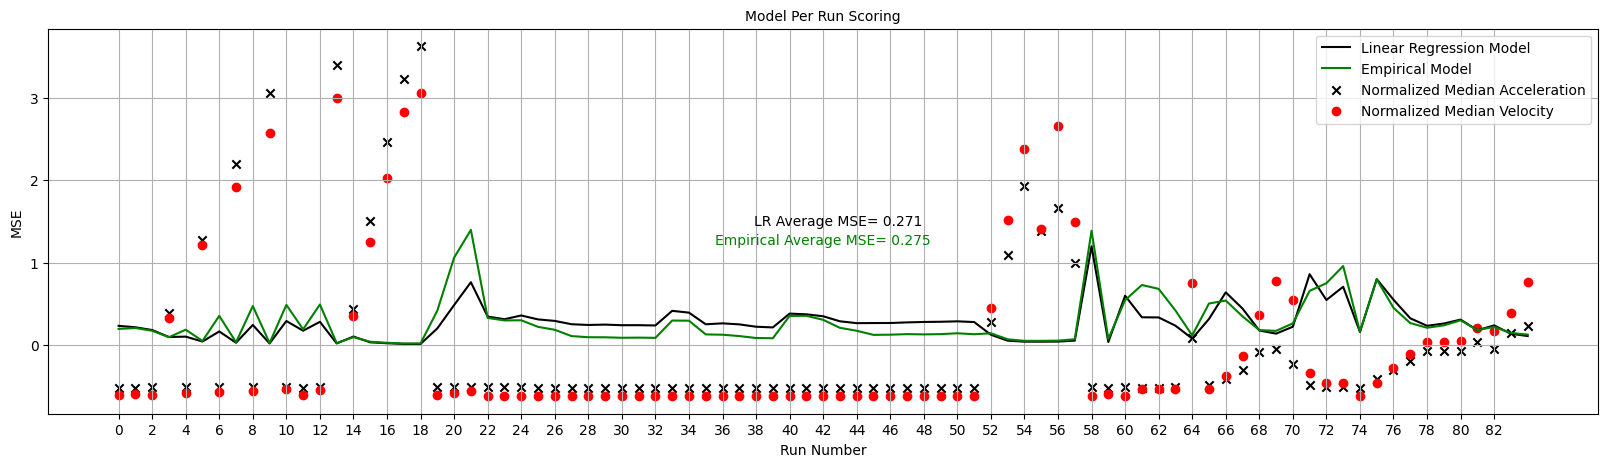

In [12]:
importlib.reload(post_process) #used to reload file if it has been modified during notebook use
run_number = np.arange(0,len(MSE))
Vx_median = np.array(Vx_Median) 
Ax_median = np.array(Ax_Median) 
norm_Vx, _ = preprocess_data.z_score_normalize(Vx_median)
norm_Ax, _ = preprocess_data.z_score_normalize(Ax_median)
f, ax   = plt.subplots(nrows=1,ncols=1, figsize=(20,5))
axs = ax
axs.scatter(run_number, norm_Ax, marker = 'x', color = 'k', label = 'Normalized Median Acceleration')
axs.scatter(run_number, norm_Vx, marker = 'o', color = 'r', label = 'Normalized Median Velocity')
axs.plot(run_number, MSE, label = 'Linear Regression Model', color = 'k')
axs.plot(run_number, MSE_empirical, label = 'Empirical Model', color = 'g')
axs.set_xlabel('Run Number')
axs.set_ylabel('MSE')
axs.set_title('Model Per Run Scoring', fontsize = 10)
axs.legend()
plt.setp(ax, xticks = run_number[0:-1:2], xticklabels = run_number[0:-1:2])
axs.grid(which = 'both', axis = 'both')
axs.text(0.51, 0.5, 'LR Average MSE= %.3f'%(np.mean(MSE)), horizontalalignment='center', verticalalignment='center', transform=axs.transAxes, color = 'k', fontsize = 10)
axs.text(0.5, 0.45, 'Empirical Average MSE= %.3f'%(np.mean(MSE_empirical)), horizontalalignment='center', verticalalignment='center', transform=axs.transAxes, color = 'g', fontsize = 10)

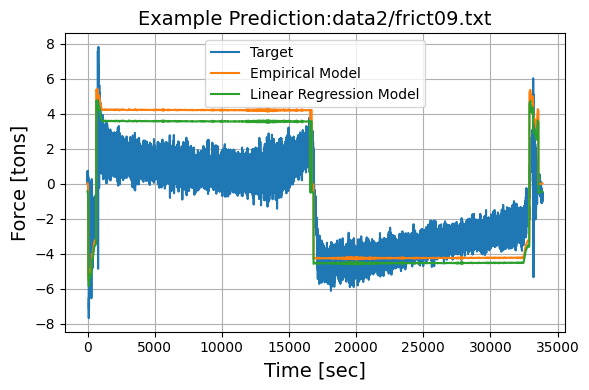

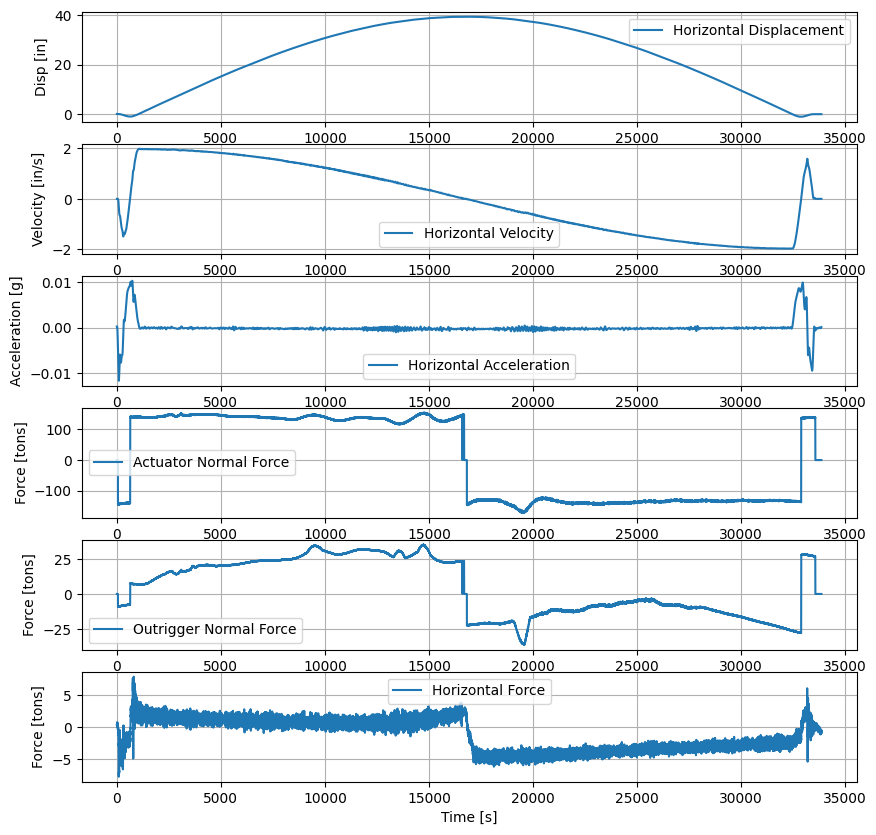

In [14]:
prediction, empirical_prediction, signals, run_name = data[73]
time = np.arange(0,len(signals))

# target and prediction plot
plt.figure(figsize=(6,4))
plt.plot(time, signals[:,-1], label = 'Target')
plt.plot(time, empirical_prediction, label = 'Empirical Model')
plt.plot(time, prediction, label = 'Linear Regression Model')
plt.ylabel('Force [tons]', fontsize = 14)
plt.xlabel('Time [sec]', fontsize = 14)
plt.title('Example Prediction:' + run_name, fontsize=14)
plt.legend()
plt.tight_layout()
plt.grid()

post_process.plot_signals(signals, time)

## 6. Conclusions <a class="anchor" id="sixth-bullet">
Dependent on the selected features, the trained model is shown to generally produce better testing metrics than that of the originally derived empirical model for this set of data. Variability in results is still seen for low amplitude acceleration runs. This could in part be due to class imbalance. The considered data set has a large amount of higher acceleration runs. This will lead the MSE minimizing schemes to be weighted towards those data sets. Additionally, it is expected for there to be a more nonlinear relationship between the model features and target at those amplitudes. To address this issue, class imbalance procedures will be implemented and PINNs will be explored to develop a physics guided deep neural network that may be able to capture the nonlinear friction relationship more accurately. 